[*********************100%%**********************]  1 of 1 completed


C:\Users\HHGiang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:           Daily_Return   No. Observations:                 2262
Model:               MarkovRegression   Log Likelihood               -5545.442
Date:                Thu, 11 Jan 2024   AIC                          11102.884
Time:                        05:27:13   BIC                          11137.228
Sample:                             0   HQIC                         11115.416
                               - 2262                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0881      0.059     -1.498      0.134      -0.203       0.027
sigma2         3.5294      0.246     14.343      0.0

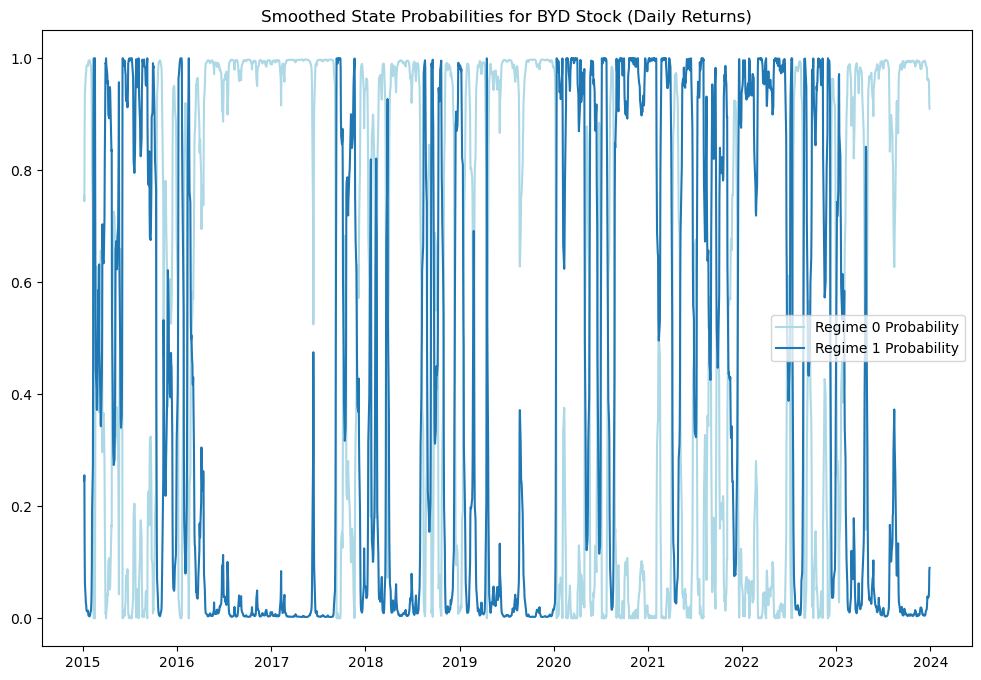

In [64]:
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Fetch BYD stock data at a monthly interval
ticker_symbol = "BYDDF"  # BYD Co Ltd's stock symbol
start_date = "2000-01-01"
end_date = "2024-01-01"
byd_stock_data1 = yf.download(ticker_symbol, start=start_date, end=end_date)

# Drop any NaN values that may have been included in the data retrieval
byd_stock_data1 = byd_stock_data1.dropna()

# Calculate log returns for the monthly data
byd_stock_data1['Daily_Return'] = byd_stock_data['Adj Close'].pct_change() * 100

byd_stock_data1 = byd_stock_data1.dropna()

# Fit the Markov Switching Model to the log returns of the monthly data
model1 = sm.tsa.MarkovRegression(byd_stock_data1['Daily_Return'], k_regimes=2, switching_variance=True)
results1 = model1.fit()

# Print the summary of the model
print(results1.summary())

# Estimate the duration of staying in each regime
print("Expected duration in each regime:", results1.expected_durations)

# Plot the smoothed state probabilities for the monthly log returns
plt.figure(figsize=(12, 8))
plt.plot(byd_stock_data1.index, results1.smoothed_marginal_probabilities[0], label='Regime 0 Probability', color='lightblue')
plt.plot(byd_stock_data1.index, results1.smoothed_marginal_probabilities[1], label='Regime 1 Probability')
plt.title('Smoothed State Probabilities for BYD Stock (Daily Returns)')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


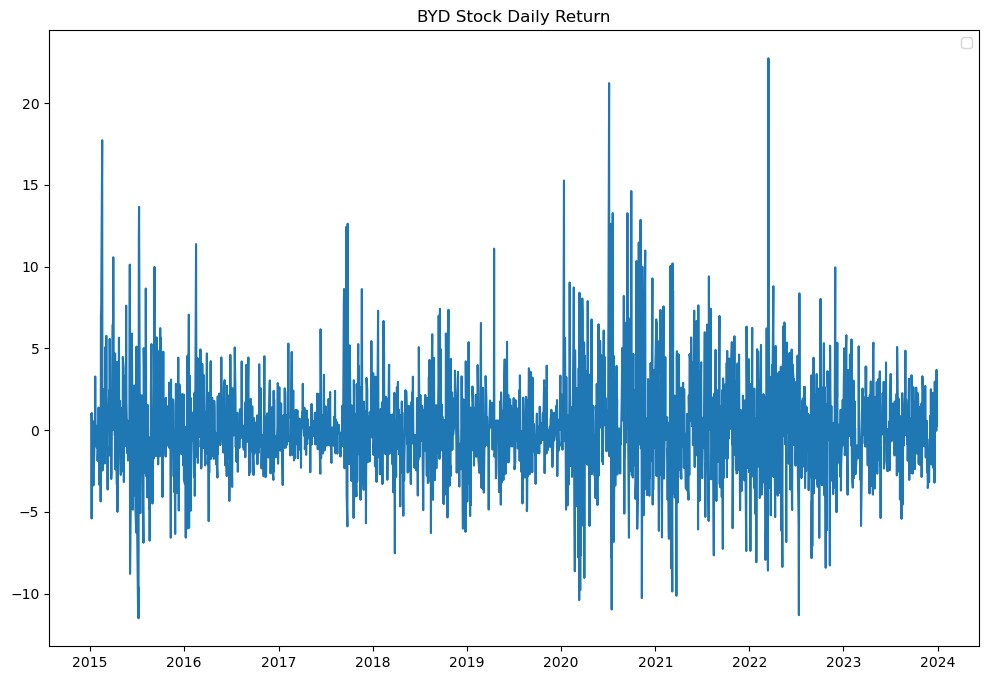

In [70]:
plt.figure(figsize=(12, 8))
plt.plot(byd_stock_data1['Daily_Return'])
plt.title('BYD Stock Daily Return')
plt.legend()
plt.show()

In [72]:
import yfinance as yf
import numpy as np
import pandas as pd

# Define the tickers
byd_ticker = 'BYDDF'  # Adjust if a different ticker is required
sp500_ticker = '^GSPC'  # S&P 500
ev_etf_ticker = 'DRIV'  # Global X Autonomous & Electric Vehicles ETF

# Download the stock price data
start_date = '2000-01-01'
end_date = '2024-01-01'  # Adjust dates as per your requirement

byd_data = yf.download(byd_ticker, start=start_date, end=end_date)['Adj Close']
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)['Adj Close']
ev_etf_data = yf.download(ev_etf_ticker, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
byd_daily = byd_data.pct_change() * 100
sp500_daily = sp500_data.pct_change() * 100
ev_etf_daily = ev_etf_data.pct_change() * 100

# Drop NaN values
byd_daily.dropna(inplace=True)
sp500_daily.dropna(inplace=True)
ev_etf_daily.dropna(inplace=True)


import seaborn as sns
import matplotlib.pyplot as plt

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [74]:
byd_daily.head()

Date
2009-02-17   -4.545449
2009-02-18    9.523808
2009-02-19   -4.347831
2009-02-20   -6.818184
2009-02-23   -4.878042
Name: Adj Close, dtype: float64

In [75]:
sp500_daily.head()

Date
2000-01-04   -3.834467
2000-01-05    0.192218
2000-01-06    0.095568
2000-01-07    2.709040
2000-01-10    1.118997
Name: Adj Close, dtype: float64

In [76]:
ev_etf_daily.head()

Date
2018-04-18    0.000000
2018-04-19   -0.791894
2018-04-20   -1.068677
2018-04-23   -0.980174
2018-04-24   -1.077455
Name: Adj Close, dtype: float64

In [77]:
# Model BYD returns with S&P 500 as an external factor
X1 = sm.add_constant(sp500_daily)  # Add a constant term to the model
model_sp500 = sm.tsa.MarkovRegression(byd_daily, exog=X1, k_regimes=2, switching_variance=True)
results_sp500 = model_sp500.fit()


# Display the results
print(results_sp500.summary())

print("Expected duration in each regime:", results_sp500.expected_durations)

import matplotlib.pyplot as plt

# Plotting the smoothed probabilities for the model with S&P 500
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(results_sp500.smoothed_marginal_probabilities[0], label='Regime 0 (Low Volatility)', color='lightblue')
ax.plot(results_sp500.smoothed_marginal_probabilities[1], label='Regime 1 (High Volatility)')

ax.set(title='Smoothed State Probabilities for BYD with S&P 500', xlabel='Date', ylabel='Probability')
ax.legend(loc='upper left')

plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3744 and the array at index 1 has size 6036

In [32]:
print("Expected duration in each regime:", results_sp500.expected_durations)

Expected duration in each regime: [28.37652918 20.69075921]


C:\Users\HHGiang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:              Adj Close   No. Observations:                 1426
Model:               MarkovRegression   Log Likelihood               -3387.437
Date:                Thu, 11 Jan 2024   AIC                           6794.874
Time:                        04:53:49   BIC                           6847.501
Sample:                             0   HQIC                          6814.529
                               - 1426                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0592        nan        nan        nan         nan         nan
x1            -0.0592        nan        nan        n

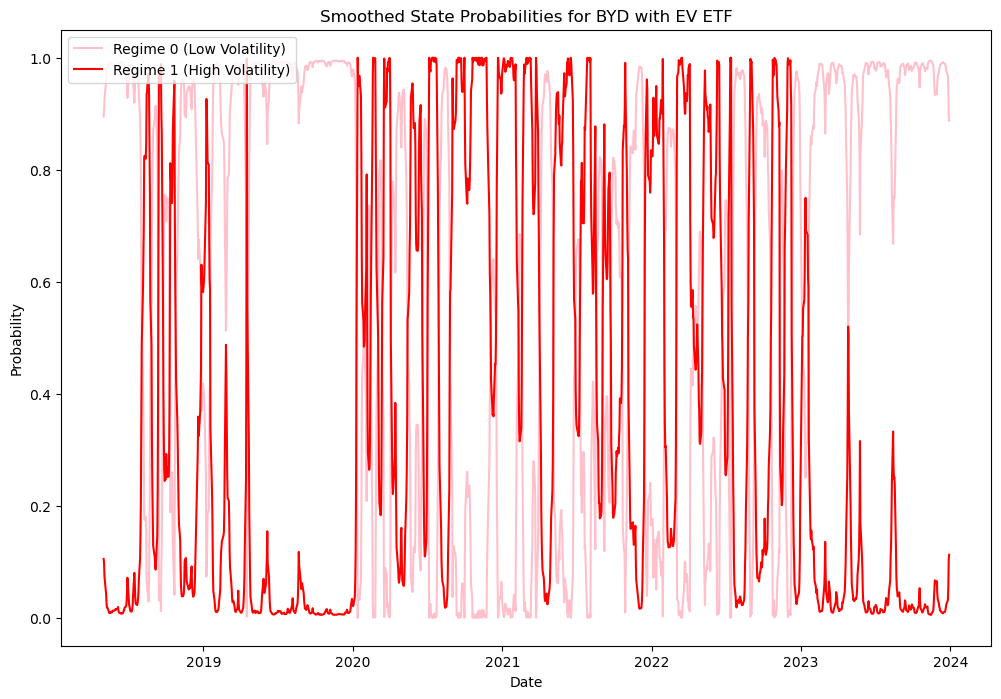

In [63]:
# Model BYD returns with EV ETF as an external factor
X2 = sm.add_constant(ev_etf_log_returns)  # Add a constant term to the model
model_ev_etf = sm.tsa.MarkovRegression(byd_log_returns, exog=X2, k_regimes=2, switching_variance=True)
results_ev_etf = model_ev_etf.fit()

# Display the results
print(results_ev_etf.summary())

print("Expected duration in each regime:", results_ev_etf.expected_durations)
# Plotting the smoothed probabilities for the model with EV ETF
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(results_ev_etf.smoothed_marginal_probabilities[0], label='Regime 0 (Low Volatility)', color='pink')
ax.plot(results_ev_etf.smoothed_marginal_probabilities[1], label='Regime 1 (High Volatility)', color='red')

ax.set(title='Smoothed State Probabilities for BYD with EV ETF', xlabel='Date', ylabel='Probability')
ax.legend(loc='upper left')

plt.show()

[*********************100%%**********************]  1 of 1 completed


C:\Users\HHGiang\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


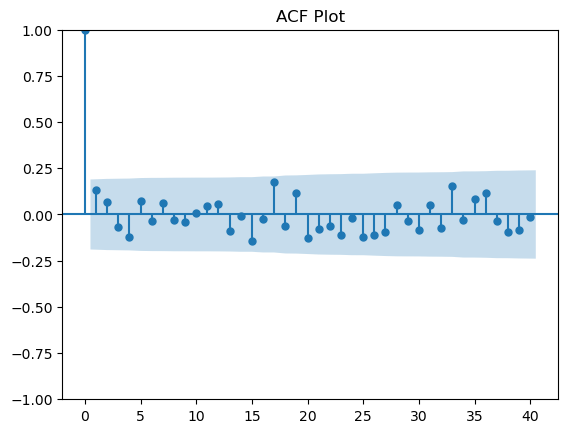

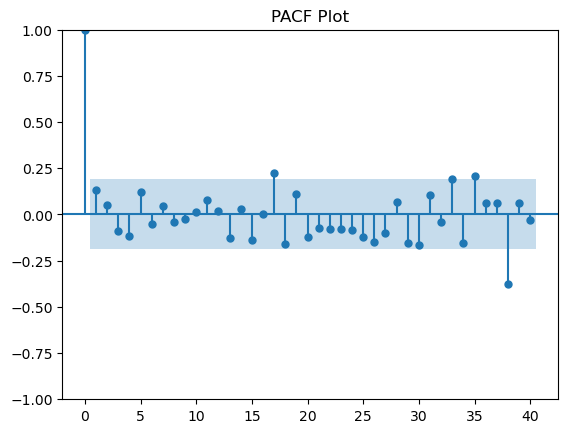

In [53]:
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.regime_switching.markov_autoregression import MarkovAutoregression

# Define the ticker symbol and download the stock data
ticker_symbol = 'BYDDF'
start_date = '2015-01-01'
end_date = '2024-01-01'

# Download the adjusted closing prices
data = yf.download(ticker_symbol, start=start_date, end=end_date, interval='1mo')
data['Log_Returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# Drop missing values
data.dropna(inplace=True)

# Plot ACF and PACF
plot_acf(data['Log_Returns'], lags=40, title='ACF Plot')
plot_pacf(data['Log_Returns'], lags=40, title='PACF Plot')
plt.show()

In [62]:
from statsmodels.tsa.api import arma_order_select_ic  # Import the arma_order_select_ic function
# Identify the order of the ARMA model (you can choose max_ar and max_ma values)
order = arma_order_select_ic(y=data['Log_Returns'], max_ar=7, max_ma=7, trend="n")
print(order)

C:\Users\HHGiang\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HHGiang\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HHGiang\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HHGiang\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HHGiang\anaconda3\lib\site-packages\statsmodels\tsa\state

C:\Users\HHGiang\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\HHGiang\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'bic':             0           1           2           3           4          5  \
0 -116.956708 -114.255106 -110.952434 -106.460740 -103.147335 -99.111569   
1 -114.581973 -110.127454 -106.334578 -104.946157 -101.455498 -96.677127   
2 -110.394012 -105.842345 -104.661109 -103.544673  -95.234529 -92.146932   
3 -106.277048 -101.840162 -104.963402 -100.063222  -90.490104 -87.695276   
4 -102.600574  -99.678424  -95.260601  -90.590683  -88.636849 -81.306552   
5  -99.667093  -95.321687  -90.798847  -86.024103  -86.684272 -83.973875   
6  -95.105228  -90.677182  -86.096306  -81.461426  -81.285805 -78.603744   
7  -90.825586  -86.178560  -82.488700  -77.269633  -72.710779 -68.972453   

           6          7  
0 -94.786768 -91.091815  
1 -90.459764 -86.547518  
2 -88.019770 -82.570471  
3 -85.500058 -81.996792  
4 -79.841910 -74.677782  
5 -81.508565 -72.245896  
6 -76.844131 -68.311531  
7 -71.276990 -68.211508  , 'bic_min_order': (0, 0)}


C:\Users\HHGiang\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\HHGiang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                         Markov Switching Model Results                         
Dep. Variable:              Log_Returns   No. Observations:                  105
Model:             MarkovAutoregression   Log Likelihood                  62.824
Date:                  Thu, 11 Jan 2024   AIC                           -107.647
Time:                          03:54:34   BIC                            -83.762
Sample:                      02-01-2015   HQIC                           -97.968
                           - 12-01-2023                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0683      0.035     -1.968      0.049      -0.136      -0.000
ar.L1         -0.0636      0.197    

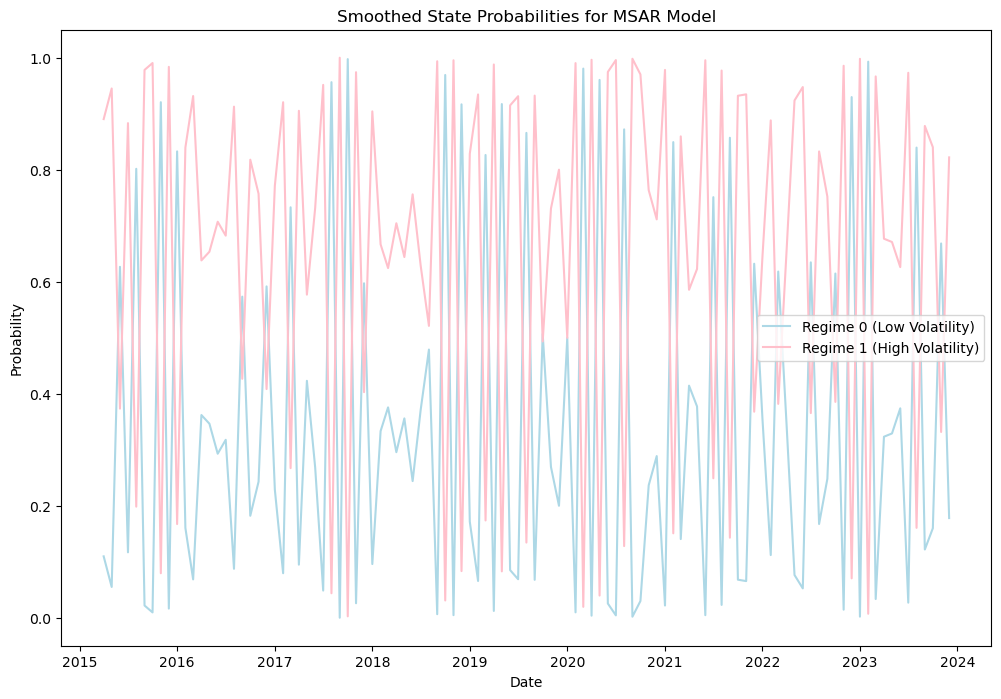

In [60]:
# Fit an MSAR model
lags = 2  # Choose the lag order based on PACF analysis
model = MarkovAutoregression(data['Log_Returns'], k_regimes=2, order=lags)
results = model.fit()

# Display the MSAR model results
print(results.summary())

# Plot the regime probabilities
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(results.smoothed_marginal_probabilities[0], label='Regime 0 (Low Volatility)', color='lightblue')
ax.plot(results.smoothed_marginal_probabilities[1], label='Regime 1 (High Volatility)', color='pink')
ax.set(title='Smoothed State Probabilities for MSAR Model', xlabel='Date', ylabel='Probability')
ax.legend()
plt.show()